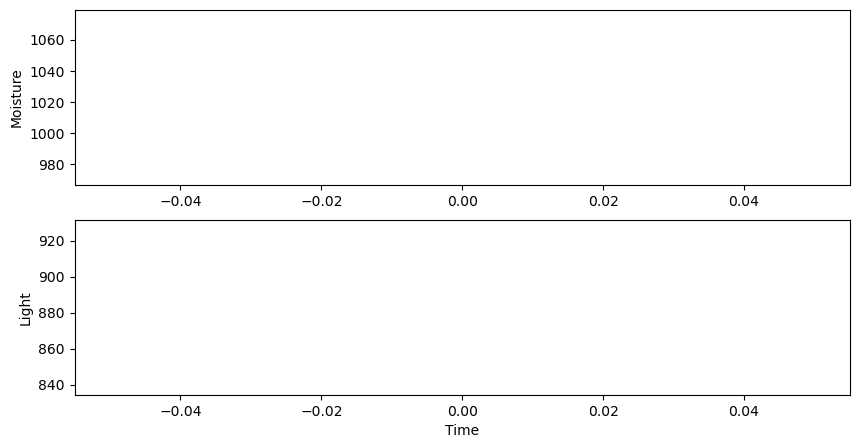

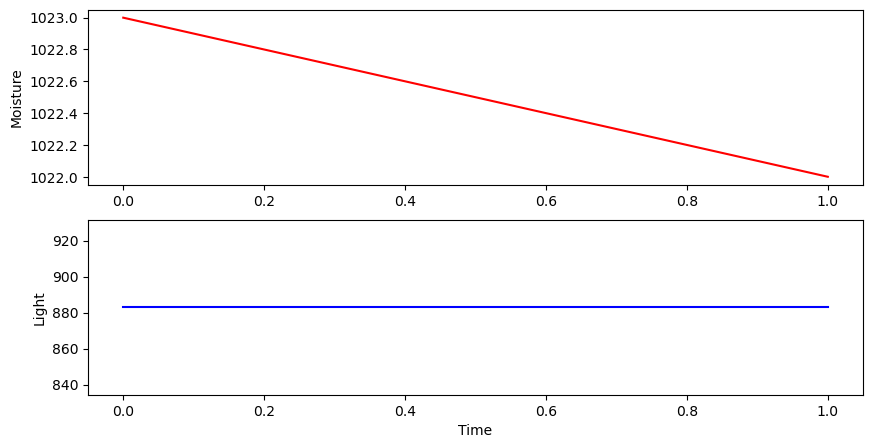

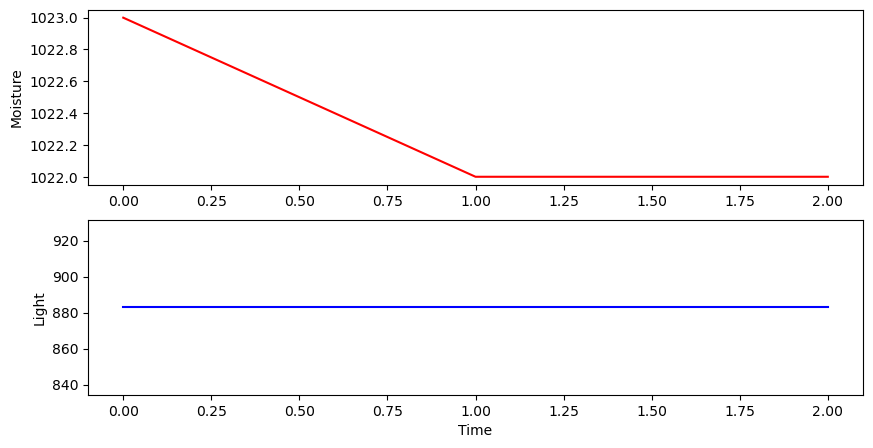

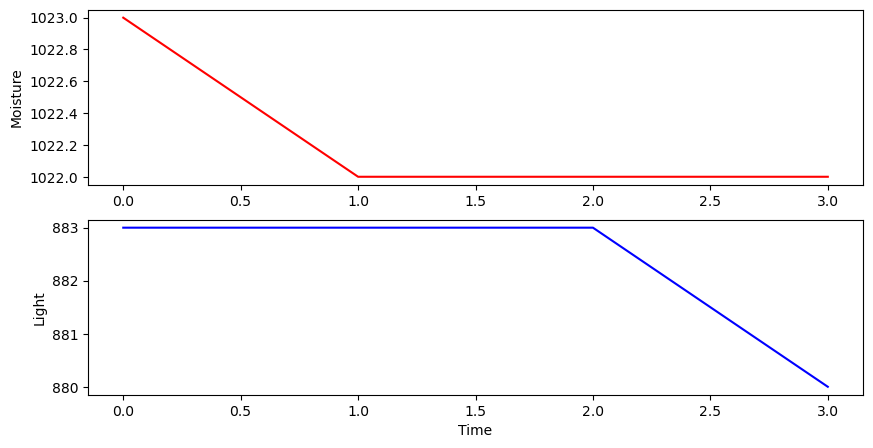

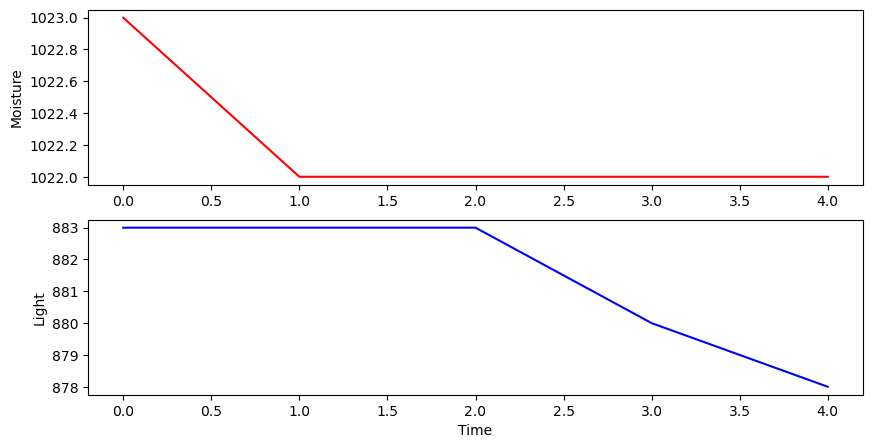

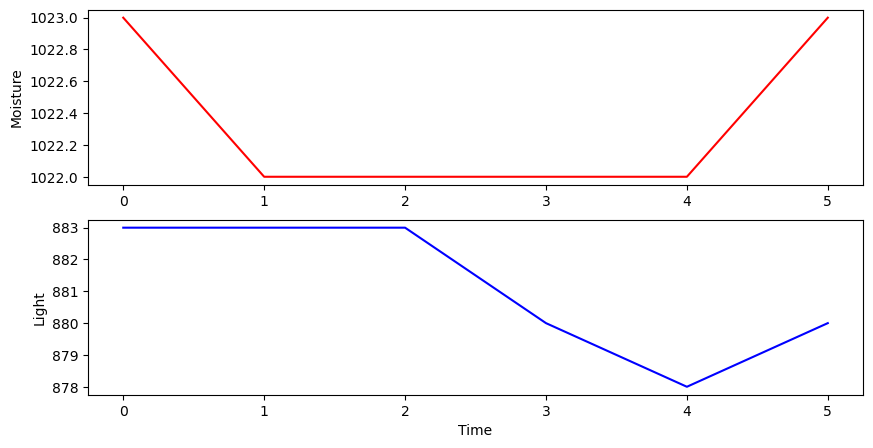

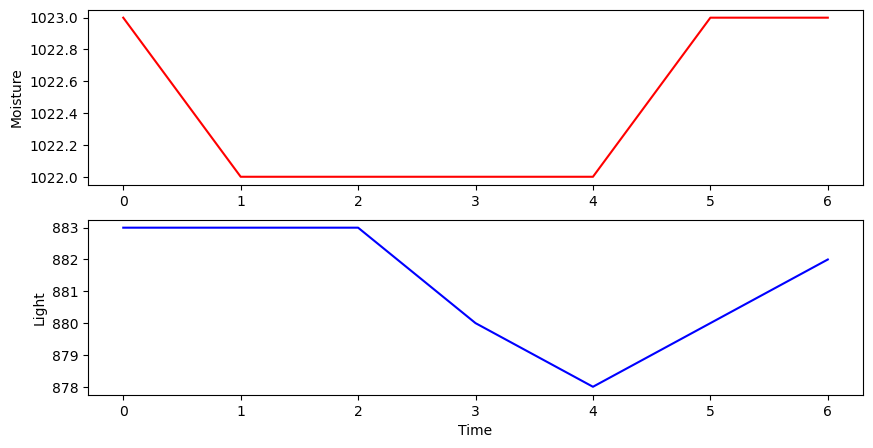

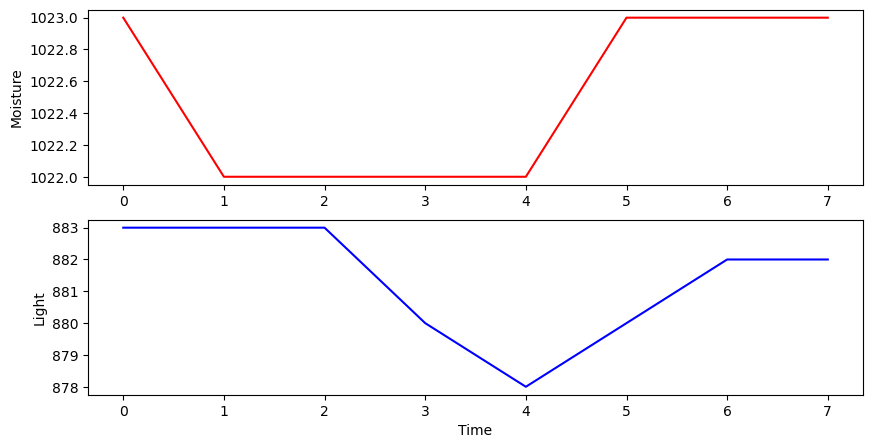

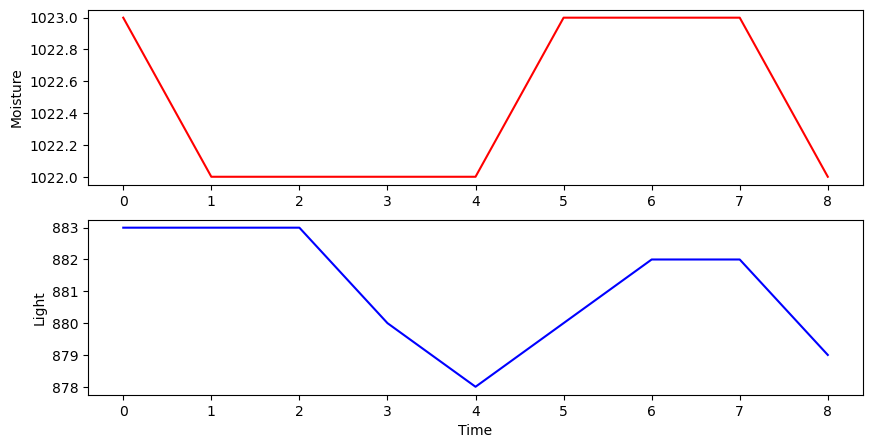

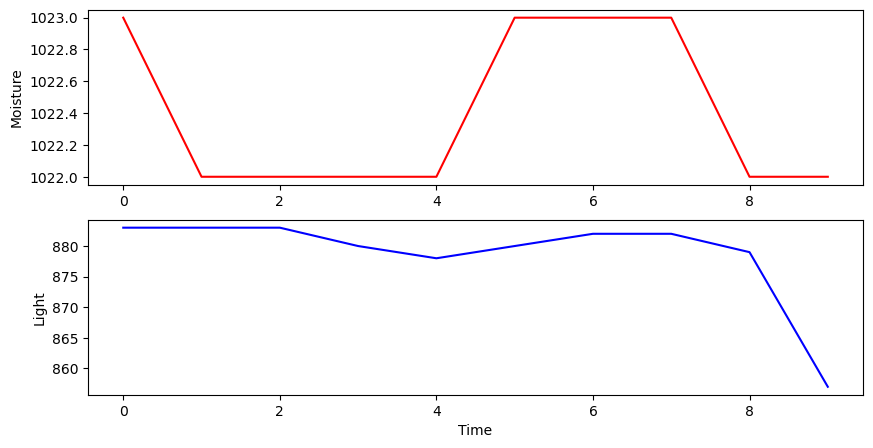

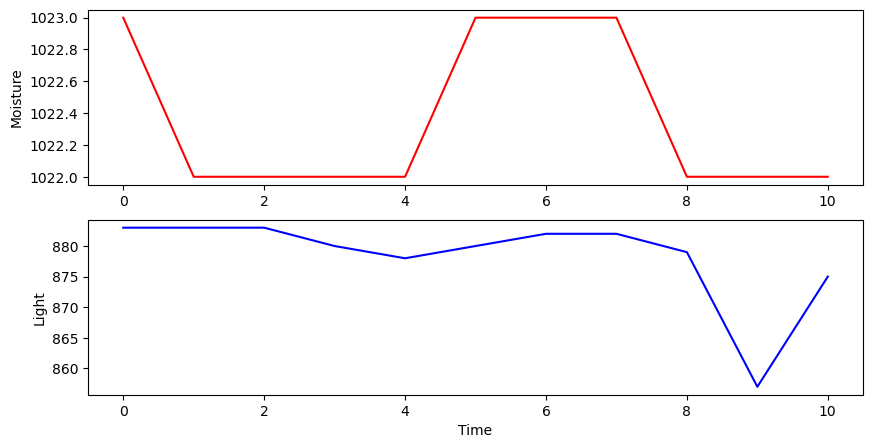

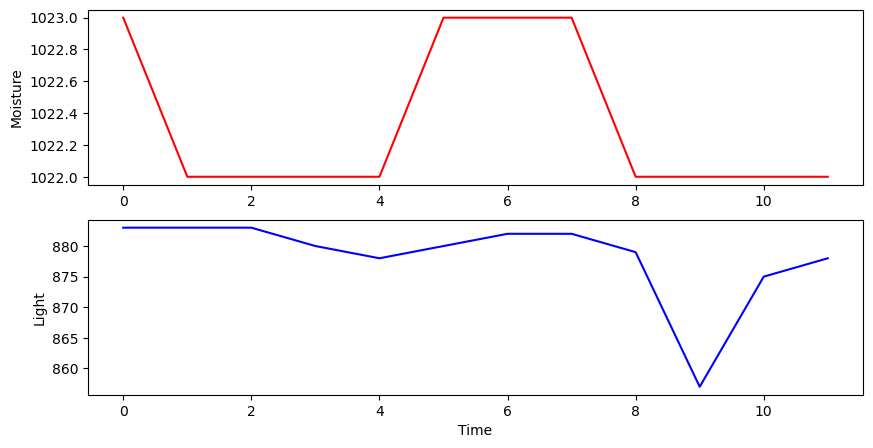

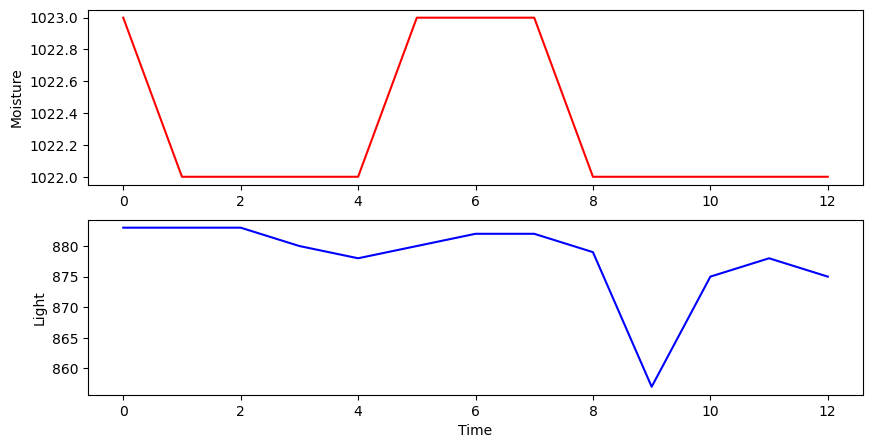

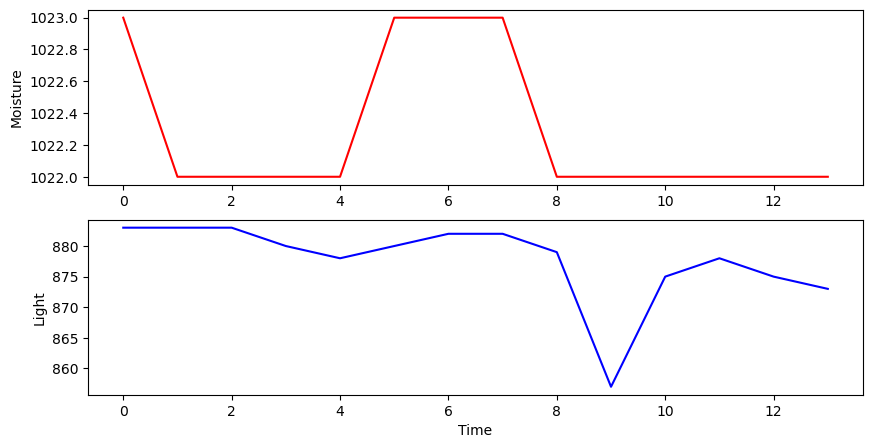

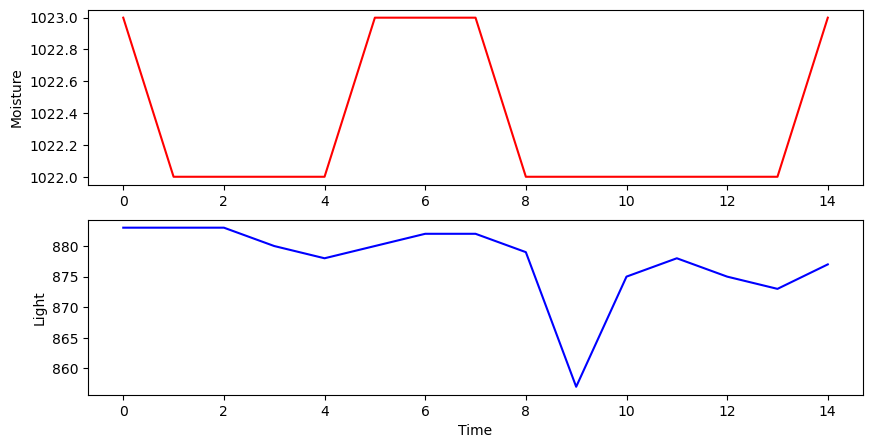

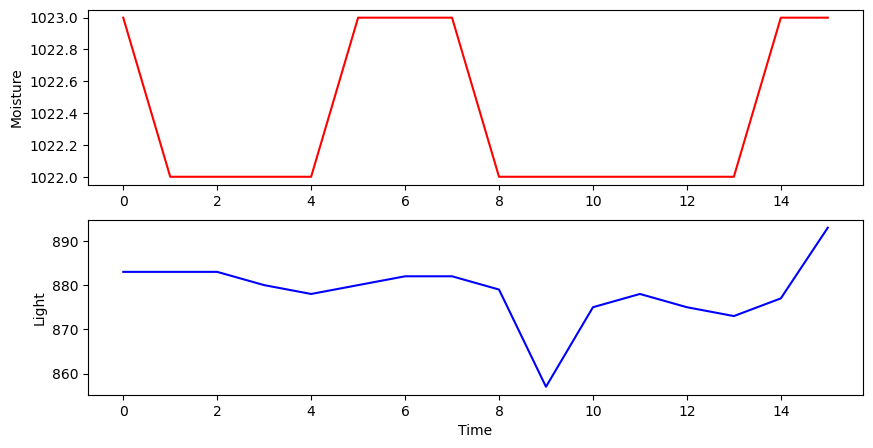

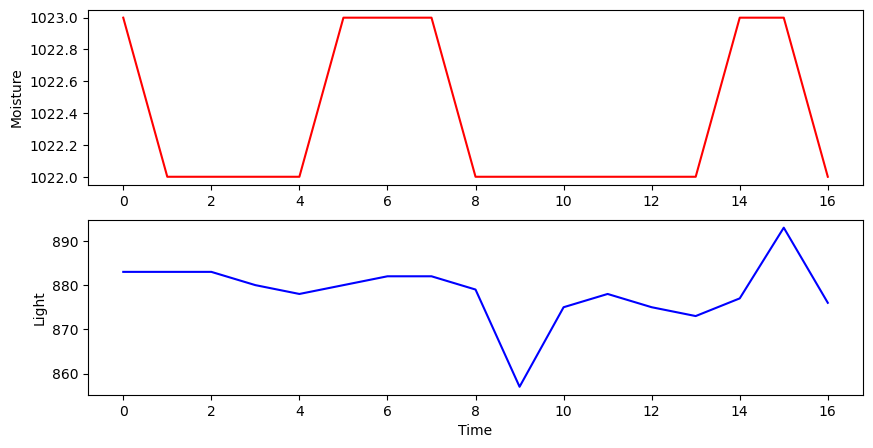

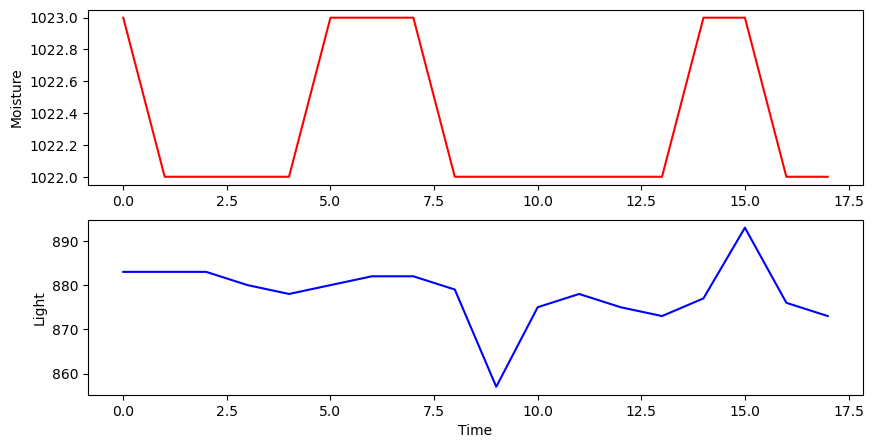

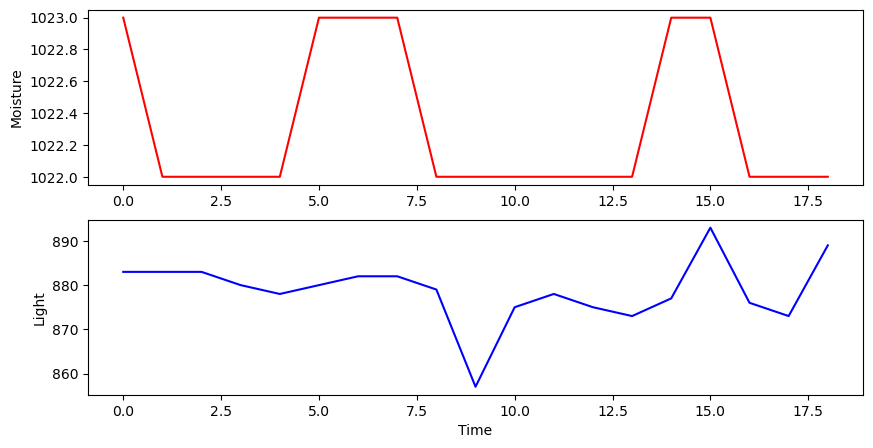

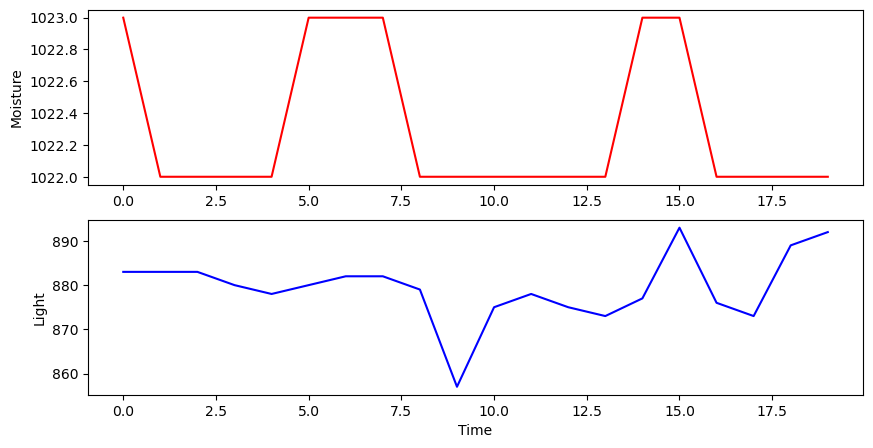

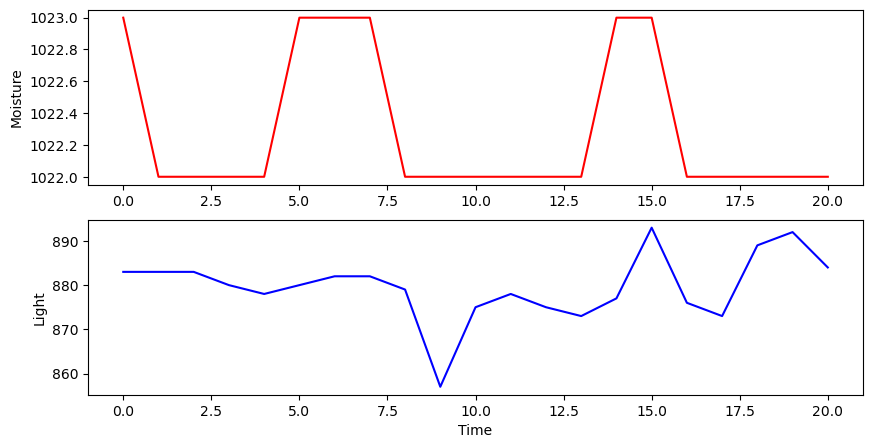

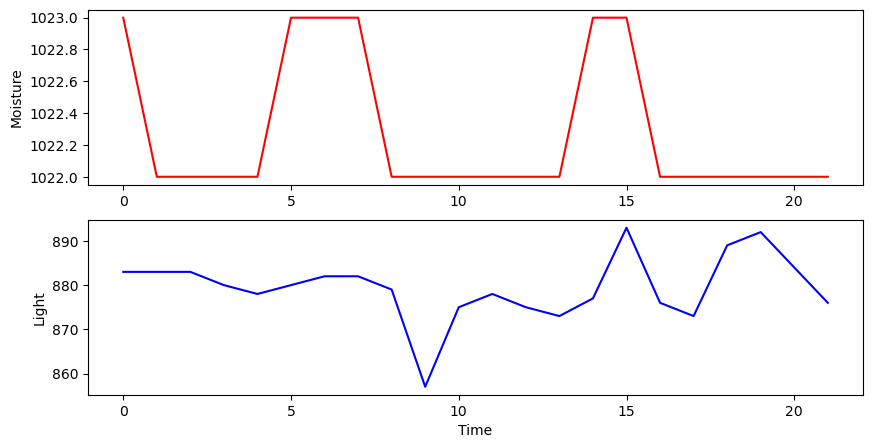

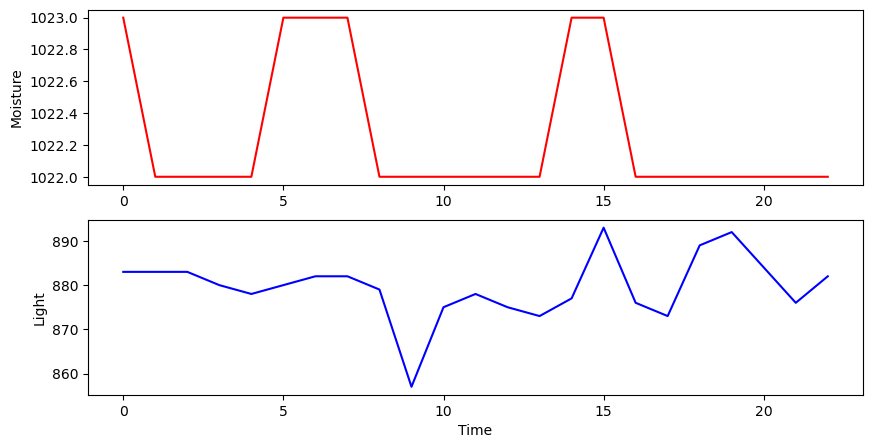

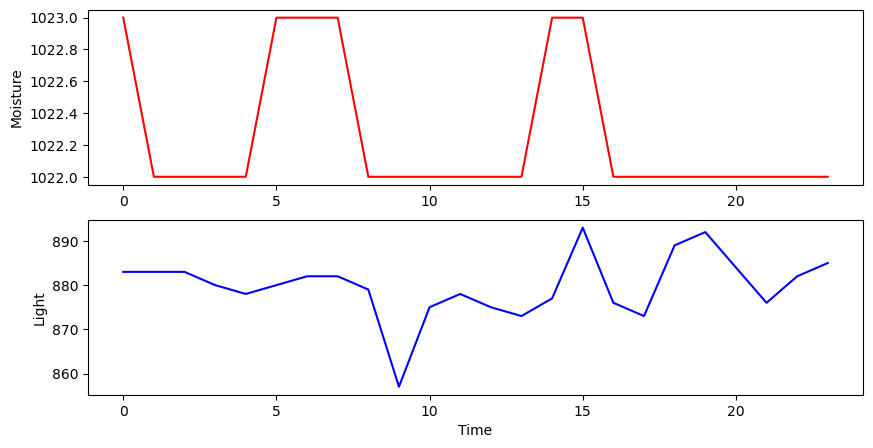

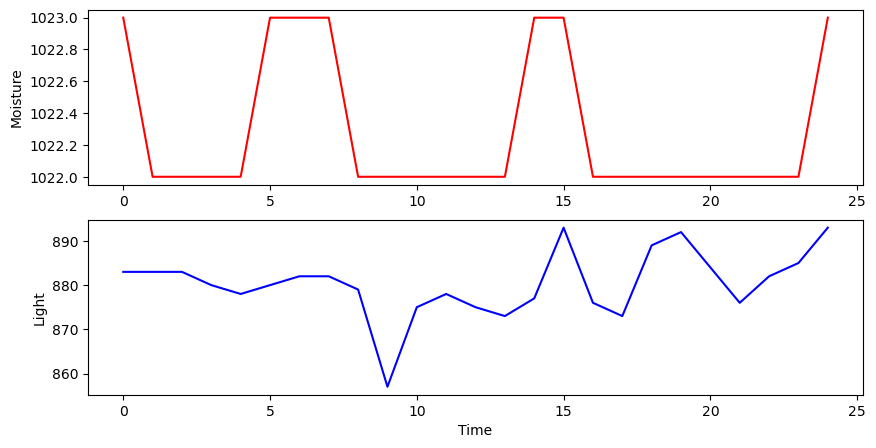

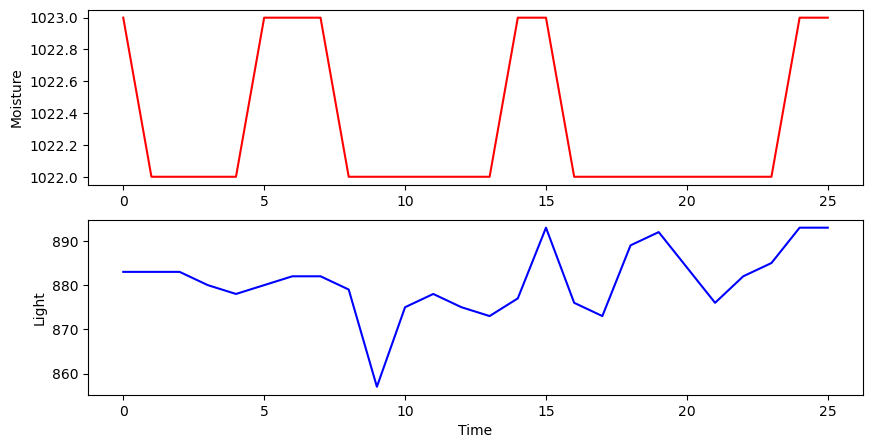

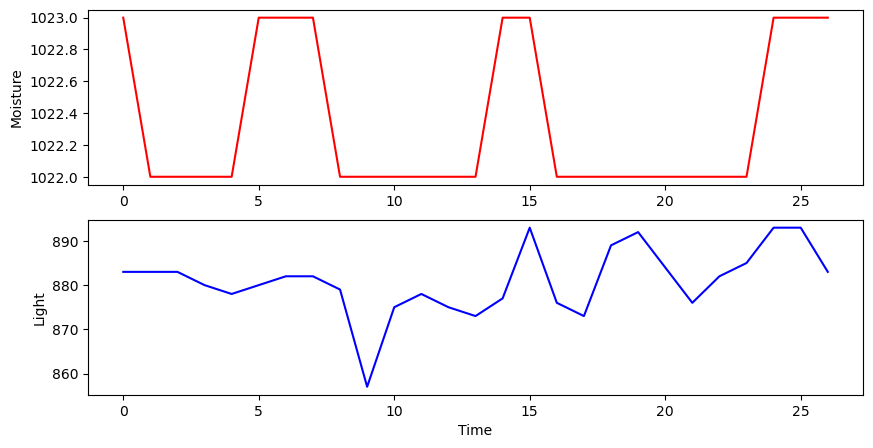

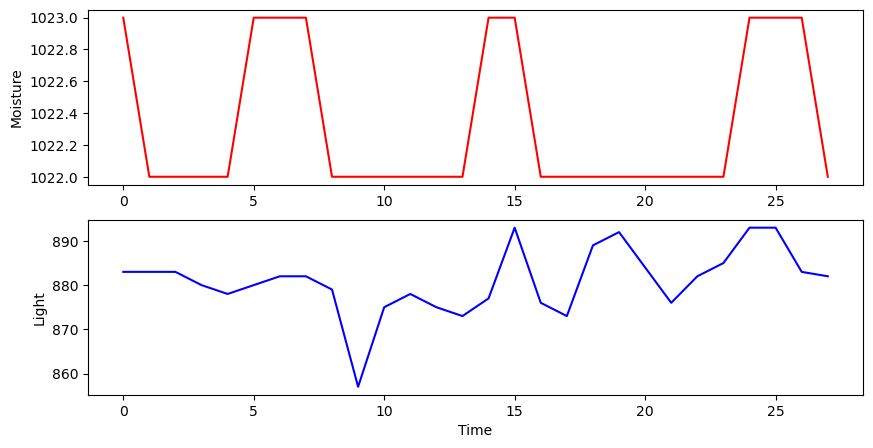

Serial connection closed.


In [6]:
import serial
import matplotlib.pyplot as plt

# Configure the serial connection
arduino_port = 'COM3'  # Replace with the correct port
baud_rate = 9600
ser = serial.Serial(arduino_port, baud_rate)

# Variables to store the data
moisture_values = []
light_values = []

# Read data from Arduino and plot the graphs
try:
    while True:
        # Read a line of data from the Arduino
        line = ser.readline().decode().strip()

        # Extract moisture and light values from the line
        moisture, light = line.split("\t")
        moisture_values.append(int(moisture.split(":")[1]))
        light_values.append(int(light.split(":")[1]))

        # Plot the graphs
        plt.figure(figsize=(10, 5))
        plt.subplot(2, 1, 1)
        plt.plot(moisture_values, 'r')
        plt.ylabel('Moisture')
        plt.subplot(2, 1, 2)
        plt.plot(light_values, 'b')
        plt.ylabel('Light')
        plt.xlabel('Time')
        plt.show(block=False)
        plt.pause(0.1)
except KeyboardInterrupt:
    ser.close()
    print('Serial connection closed.')


Serial connection and database connection closed.


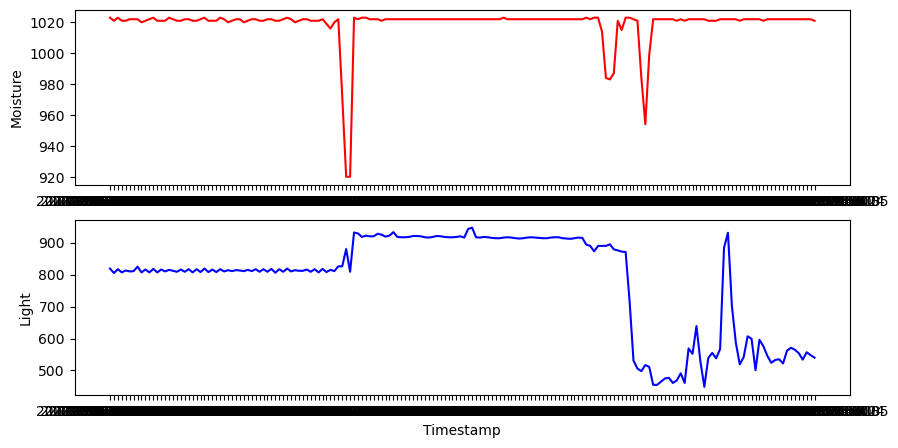

In [7]:
import serial
import sqlite3
import matplotlib.pyplot as plt
import time

# Configure the serial connection
arduino_port = 'COM3'  # Replace with the correct port
baud_rate = 9600
ser = serial.Serial(arduino_port, baud_rate)

# Connect to the SQLite database
conn = sqlite3.connect('sensor_data.db')
c = conn.cursor()

# Create the table if it doesn't exist
c.execute('''CREATE TABLE IF NOT EXISTS sensor_data
             (timestamp DATETIME, moisture INT, light INT)''')

# Variables to store the data
moisture_values = []
light_values = []

# Read data from Arduino and insert into the database
start_time = time.time()
while True:
    # Read a line of data from the Arduino
    line = ser.readline().decode().strip()

    # Extract moisture and light values from the line
    moisture, light = line.split("\t")
    moisture_value = int(moisture.split(":")[1])
    light_value = int(light.split(":")[1])

    # Insert data into the database
    current_time = time.strftime('%Y-%m-%d %H:%M:%S')
    c.execute("INSERT INTO sensor_data VALUES (?, ?, ?)", (current_time, moisture_value, light_value))
    conn.commit()

    # Append values to the lists
    moisture_values.append(moisture_value)
    light_values.append(light_value)

    # Check if 60 seconds have passed
    elapsed_time = time.time() - start_time
    if elapsed_time >= 60:
        break

    time.sleep(1)  # Wait for 1 second

ser.close()
conn.close()
print('Serial connection and database connection closed.')

# Plot the graph from the database
conn = sqlite3.connect('sensor_data.db')
c = conn.cursor()
c.execute("SELECT timestamp, moisture, light FROM sensor_data")
data = c.fetchall()
conn.close()

timestamps = [row[0] for row in data]
moisture_values = [row[1] for row in data]
light_values = [row[2] for row in data]

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(timestamps, moisture_values, 'r')
plt.ylabel('Moisture')

plt.subplot(2, 1, 2)
plt.plot(timestamps, light_values, 'b')
plt.ylabel('Light')
plt.xlabel('Timestamp')

plt.show()


In [3]:
data

[('2023-05-26 18:30:28', 1023, 819),
 ('2023-05-26 18:30:29', 1021, 805),
 ('2023-05-26 18:30:30', 1023, 817),
 ('2023-05-26 18:30:31', 1021, 807),
 ('2023-05-26 18:30:32', 1021, 813),
 ('2023-05-26 18:30:33', 1022, 810),
 ('2023-05-26 18:30:34', 1022, 811),
 ('2023-05-26 18:30:35', 1022, 825),
 ('2023-05-26 18:30:36', 1020, 807),
 ('2023-05-26 18:30:37', 1021, 816),
 ('2023-05-26 18:30:38', 1022, 807),
 ('2023-05-26 18:30:39', 1023, 818),
 ('2023-05-26 18:30:40', 1021, 807),
 ('2023-05-26 18:30:41', 1021, 816),
 ('2023-05-26 18:30:42', 1021, 810),
 ('2023-05-26 18:30:43', 1023, 815),
 ('2023-05-26 18:30:44', 1022, 812),
 ('2023-05-26 18:30:45', 1021, 809),
 ('2023-05-26 18:30:46', 1021, 816),
 ('2023-05-26 18:30:47', 1022, 809),
 ('2023-05-26 18:30:48', 1022, 817),
 ('2023-05-26 18:30:49', 1021, 807),
 ('2023-05-26 18:30:50', 1021, 817),
 ('2023-05-26 18:30:51', 1022, 808),
 ('2023-05-26 18:30:52', 1023, 819),
 ('2023-05-26 18:30:53', 1021, 808),
 ('2023-05-26 18:30:54', 1021, 816),
 

In [4]:
import pandas as pd
columns = ['timestamp', 'moisture', 'light']
df = pd.DataFrame(data, columns=columns)

In [5]:
df

,timestamp,moisture,light
0,2023-05-26 18:30:28,1023,819
1,2023-05-26 18:30:29,1021,805
2,2023-05-26 18:30:30,1023,817
3,2023-05-26 18:30:31,1021,807
4,2023-05-26 18:30:32,1021,813
...,...,...,...
116,2023-05-26 19:40:46,1022,913
117,2023-05-26 19:40:47,1022,912
118,2023-05-26 19:40:48,1022,914
119,2023-05-26 19:40:49,1022,916
